In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Példa 1

In [27]:
df=pd.read_excel('formazottbi2.xlsx')

In [28]:
df

,Tevékenység,Ország,2004,2006,2008,2010,2012,2014,2016
0,"Agriculture, forestry and fishing",Belgium,1 186 648,361 827,287 656,225 622,165 463,311 835,269 190
1,"Agriculture, forestry and fishing",Bulgária,722 228,632 966,754 286,618 107,903 119,835 401,617 689
2,"Agriculture, forestry and fishing",Csehország,1 244 149,315 585,254 546,113 683,196 063,135 313,114 575
3,"Agriculture, forestry and fishing",Dánia,24 038,27 550,40 731,189 101,75 225,117 682,201 648
4,"Agriculture, forestry and fishing",Németország,1 226 989,1 515 272,1 350 758,256 272,648 869,438 829,1 126 134
5,"Agriculture, forestry and fishing",Észtország,183 860,118 829,240 005,109 873,77 404,121 677,113 946
6,"Agriculture, forestry and fishing",Írország,8 706,0,19 376,101 143,96 251,96 251,..
7,"Agriculture, forestry and fishing",Görögország,4 711 294,4 711 294,0,5 073,9 979,10 976,..
8,"Agriculture, forestry and fishing",Spanyolország,17 986 083,15 152 405,11 355 660,5 816 630,5 496 458,5 817 439,6 271 464
9,"Agriculture, forestry and fishing",Franciaország,1 221 940,1 221 940,1 312 890,1 371 625,1 290 136,1 274 216,1 315 214


A `stack` egymásra rakja az oszlopokat.

In [29]:
pd.DataFrame(df.stack()).head()

0
0 Tevékenység  Agriculture, forestry and fishing
  Ország                                 Belgium
  2004                                 1 186 648
  2006                                   361 827
  2008                                   287 656

Most nem teljesen jó, mert előbb az országot és a tevékenységet ki kellene ragadjuk onnan. Ezért `index`et csinálunk belőlük.

In [30]:
df.columns

Index(['Tevékenység', 'Ország', 2004, 2006, 2008, 2010, 2012, 2014, 2016], dtype='object')

In [31]:
df.set_index(['Tevékenység','Ország']).head(2)

2004     2006     2008  \
Tevékenység                       Ország                                  
Agriculture, forestry and fishing Belgium   1 186 648  361 827  287 656   
                                  Bulgária    722 228  632 966  754 286   

                                               2010     2012     2014     2016  
Tevékenység                       Ország                                        
Agriculture, forestry and fishing Belgium   225 622  165 463  311 835  269 190  
                                  Bulgária  618 107  903 119  835 401  617 689

Az eddig műveleteket memóriában végeztük. Most felülírjuk a `df`et.

In [32]:
df=pd.DataFrame(df.set_index(['Tevékenység','Ország']).stack())

`reset_index` paranccsal újra visszatesszük az index oszlopot az adatoszlopok közé.

In [33]:
df=df.reset_index()

In [34]:
df.head()

,Tevékenység,Ország,level_2,0
0,"Agriculture, forestry and fishing",Belgium,2004,1 186 648
1,"Agriculture, forestry and fishing",Belgium,2006,361 827
2,"Agriculture, forestry and fishing",Belgium,2008,287 656
3,"Agriculture, forestry and fishing",Belgium,2010,225 622
4,"Agriculture, forestry and fishing",Belgium,2012,165 463


Átnevezzük az oszlopokat azzá amit szeretnénk.

In [35]:
df.columns=['Tevékenység', 'Ország','Év','Érték']

In [36]:
df.head()

,Tevékenység,Ország,Év,Érték
0,"Agriculture, forestry and fishing",Belgium,2004,1 186 648
1,"Agriculture, forestry and fishing",Belgium,2006,361 827
2,"Agriculture, forestry and fishing",Belgium,2008,287 656
3,"Agriculture, forestry and fishing",Belgium,2010,225 622
4,"Agriculture, forestry and fishing",Belgium,2012,165 463


Az év és érték oszlopokat előbb egész számmá kell konvertáljuk plottolás előtt.

In [37]:
df['Év']=df['Év'].astype(int)

A space karaktereket először ki kell cseréljük. A pandasban a `replace` függvény a teljes cella tartalmára vonatkozik, ezért a `str.replpace`-t használjuk.

In [38]:
import numpy as np

In [43]:
df['Érték']=df['Érték'].str.replace('\xa0','')\
        .str.replace('..','')
df['Érték']=df['Érték'].replace('b','').replace('e','').replace('',np.nan).astype(float)

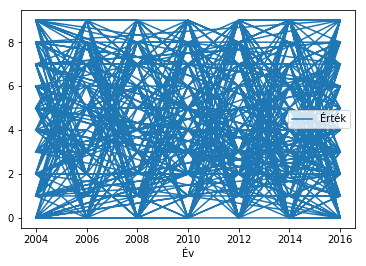

In [44]:
df.plot(x='Év',y='Érték')

Mentés

In [45]:
df.to_excel('bi_formazott.xlsx')

In [46]:
df.to_csv('bi_formazott.csv')

### Példa 2

In [47]:
dg=pd.read_csv('data_tobbacco_europe_filtered.csv')

In [48]:
dg.head()

,Unnamed: 0,Unnamed: 1,"Daily tobacco smoking, age-standardised","Daily tobacco smoking, age-standardised.1","Daily tobacco smoking, age-standardised.2","Daily cigarette smoking, age-standardised","Daily cigarette smoking, age-standardised.1","Daily cigarette smoking, age-standardised.2","Current tobacco smoking, age-standardised","Current tobacco smoking, age-standardised.1","Current tobacco smoking, age-standardised.2","Current cigarette smoking, age-standardised","Current cigarette smoking, age-standardised.1","Current cigarette smoking, age-standardised.2"
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
1,Albania,2013,23.8,41.7,6.2,21.3,38.4,4.6,29.7,51.7,8.0,24.5,44.4,5.0
2,Austria,2013,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3,Belarus,2013,22.6,40.7,7.6,21.1,38.4,6.7,27.9,48.2,10.9,25.6,44.3,10.0
4,Belgium,2013,19.7,22.6,16.9,15.5,17.4,13.7,23.9,27.5,20.5,19.8,22.5,17.2


In [49]:
dg.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Daily tobacco smoking, age-standardised',
       'Daily tobacco smoking, age-standardised.1',
       'Daily tobacco smoking, age-standardised.2',
       'Daily cigarette smoking, age-standardised',
       'Daily cigarette smoking, age-standardised.1',
       'Daily cigarette smoking, age-standardised.2',
       'Current tobacco smoking, age-standardised',
       'Current tobacco smoking, age-standardised.1',
       'Current tobacco smoking, age-standardised.2',
       'Current cigarette smoking, age-standardised',
       'Current cigarette smoking, age-standardised.1',
       'Current cigarette smoking, age-standardised.2'],
      dtype='object')

In [50]:
dg.T.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Unnamed: 0,Country,Albania,Austria,Belarus,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,The former Yugoslav republic of Macedonia,Ukraine,United Kingdom of Great Britain and Northern I...
Unnamed: 1,Year,2013,2013,2013,2013,2013,2013,2013,2013,2013,...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
"Daily tobacco smoking, age-standardised",Both sexes,23.8,Not available,22.6,19.7,30.0,31.1,Not available,24.7,15.6,...,Not available,33.5,22.0,17.7,25.7,11.8,19.5,Not available,25.4,20.3
"Daily tobacco smoking, age-standardised.1",Male,41.7,Not available,40.7,22.6,37.5,34.9,Not available,29.4,16.2,...,Not available,36.4,31.8,20.0,28.2,10.6,21.5,Not available,44.2,21.1
"Daily tobacco smoking, age-standardised.2",Female,6.2,Not available,7.6,16.9,23.1,27.6,Not available,20.3,14.9,...,Not available,30.8,12.9,15.4,23.2,13.0,17.6,Not available,9.9,19.5


In [51]:
dh=dg.T

In [52]:
dh.index[0]

'Unnamed: 0'

In [53]:
dh.columns=dh.loc[dh.index[0]]

In [54]:
dh=dh.loc[dh.index[1:]]

In [55]:
dh=dh.set_index('Country',append=True).T

In [56]:
dh.head(2)

,Unnamed: 1,"Daily tobacco smoking, age-standardised","Daily tobacco smoking, age-standardised.1","Daily tobacco smoking, age-standardised.2","Daily cigarette smoking, age-standardised","Daily cigarette smoking, age-standardised.1","Daily cigarette smoking, age-standardised.2","Current tobacco smoking, age-standardised","Current tobacco smoking, age-standardised.1","Current tobacco smoking, age-standardised.2","Current cigarette smoking, age-standardised","Current cigarette smoking, age-standardised.1","Current cigarette smoking, age-standardised.2"
Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
Unnamed: 0,,,,,,,,,,,,,
Albania,2013,23.8,41.7,6.2,21.3,38.4,4.6,29.7,51.7,8.0,24.5,44.4,5.0
Austria,2013,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available


In [57]:
import numpy as np

In [58]:
dh=pd.DataFrame(dh.set_index(dh.columns[0],append=True).\
    replace('Not available',np.nan).astype(float).stack().stack()).reset_index()

In [59]:
dh.head(2)

,Unnamed: 0,"(Unnamed: 1, Year)",Country,level_3,0
0,Albania,2013,Both sexes,"Current cigarette smoking, age-standardised",24.5
1,Albania,2013,Both sexes,"Current tobacco smoking, age-standardised",29.7


In [60]:
dh.columns=['Ország','Év','Nem','Kérdés','Érték']

In [61]:
dh.to_excel('cigi.xlsx')